# Caso Ecommerce SK Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('Ecommerce.csv')

## Análisis exploratorio

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Avatar'].value_counts()

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

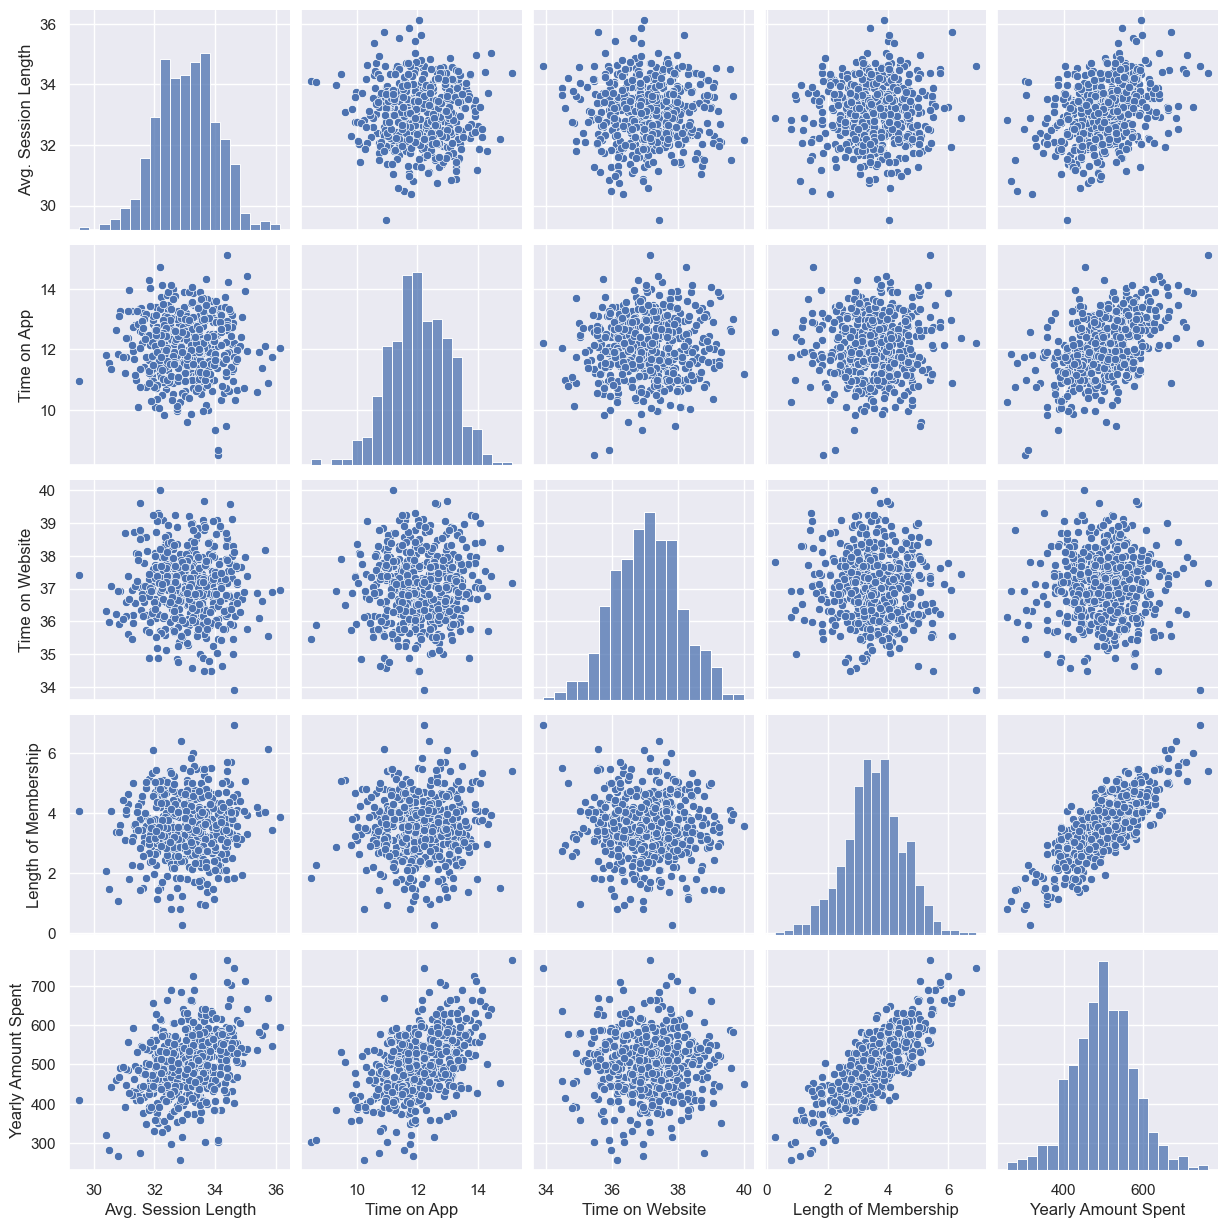

In [8]:
sns.pairplot(data=df)

C:\Users\pachi\AppData\Local\Temp\ipykernel_13820\1285996516.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)


<Axes: >

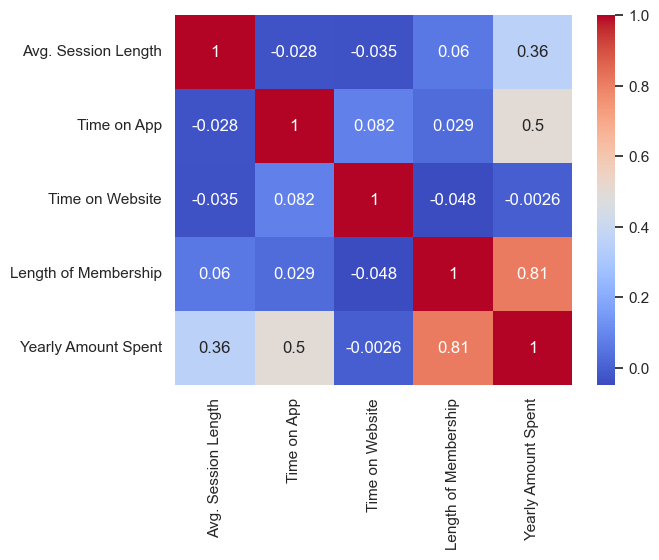

In [9]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

## Hipótesis 1:

Vamos a plantear el modelo relacionando la cantidad anual gastada con las demás variables.

### Formulación del Modelo

In [10]:
X = df[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']]  # Matriz de Features
y = df['Yearly Amount Spent']    # Vector de Resultados

#### Validación cruzada

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
                                  X, y, test_size=0.2, random_state=42) 

#### Entrenamiento del modelo lineal

In [12]:
# instanciamos el regresor
lm = LinearRegression()

# ejecutamos el entrenamiento
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
print(f'Coeficiente ajustado: {lm.coef_}')
print(f'Intercepto: {lm.intercept_}')

Coeficiente ajustado: [25.5962591  38.78534598  0.31038593 61.89682859]
Intercepto: -1044.2574146365598


Así, nuestro modelo inicial sería:

$$\text{Yearly Amount Spent}=-1044.2574146365598+25.5962591*x_{0}+38.78534598*x_{1}+0.31038593*x_{2}+61.89682859*x_{3}$$
Con:

- $x_{0}$= Avg. Session Length
- $x_{1}$= Time on App
- $x_{2}$= Time on Website
- $x_{3}$= Length of Membership

### Metricas de error

In [14]:
y_pred = lm.predict(X_test)

In [15]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test,y_pred)

8.558441885315249

In [16]:
# Mean Squared Error
metrics.mean_squared_error(y_test,y_pred)

109.86374118394005

In [17]:
# Root Medium Squared Error
metrics.mean_squared_error(y_test,y_pred)**0.5

10.481590584636477

In [18]:
# R-Squared
lm.score(X_test,y_test)

0.9778130629184126

Se puede ver que el modelo tiene un 97.78% de exactitud, lo cual es bastante bueno. 

### Análisis de residuales

Confirmamos que los residuales tengan una distribución normal:

C:\Users\pachi\AppData\Local\Temp\ipykernel_13820\2126161201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test, bins=20)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

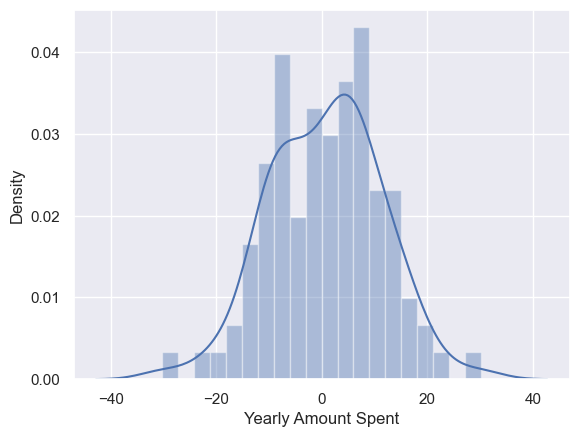

In [19]:
sns.distplot(y_pred-y_test, bins=20)

Comparamos el y_test con el y_pred (recordemos que debería ser similar a una recta $y=x$):

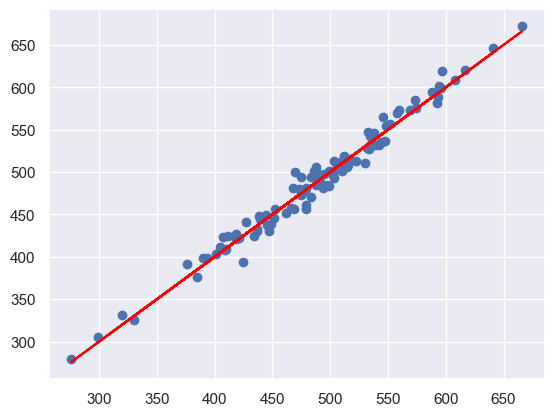

In [20]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color='red')

## Hipótesis 2:

Vamos a generar el modelo relacionando la cantidad anual gastada con todas las variables excepto la cantidad de tiempo que usan la web.

### Formulación del modelo

In [21]:
X = df[['Avg. Session Length', 'Time on App','Length of Membership']]  # Matriz de Features
y = df['Yearly Amount Spent']    # Vector de Resultados

#### Validación cruzada:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
                                  X, y, test_size=0.2, random_state=42) 

In [23]:
# instanciamos el regresor
lm = LinearRegression()

# ejecutamos el entrenamiento
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
print(f'Coeficiente ajustado: {lm.coef_}')
print(f'Intercepto: {lm.intercept_}')

Coeficiente ajustado: [25.59910468 38.81121741 61.88227895]
Intercepto: -1033.1207980077982


Así, nuestro modelo inicial sería:

$$\text{Yearly Amount Spent}=-1033.1207980077982+25.59910468*x_{0}+38.81121741*x_{1}+61.88227895*x_{2}$$
Con:

- $x_{0}$= Avg. Session Length
- $x_{1}$= Time on App
- $x_{2}$= Length of Membership

### Métricas de error

In [25]:
y_pred = lm.predict(X_test)

In [26]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test,y_pred)

8.583564848964613

In [27]:
# Mean Squared Error
metrics.mean_squared_error(y_test,y_pred)

110.32288587780572

In [28]:
# Root Medium Squared Error
metrics.mean_squared_error(y_test,y_pred)**0.5

10.503470182649433

In [29]:
# R-Squared
lm.score(X_test,y_test)

0.9777203388374341

Se puede ver que el modelo tiene un 97.77% de exactitud, lo cual es bastante bueno y no una gran diferencia con el 97.78% del modelo anterior, considerando que ocupa una variable menos. 

### Análisis de residuales

Confirmamos que los residuales tengan una distribución normal (necesario para poder hacer la regresión):

C:\Users\pachi\AppData\Local\Temp\ipykernel_13820\2126161201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test, bins=20)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

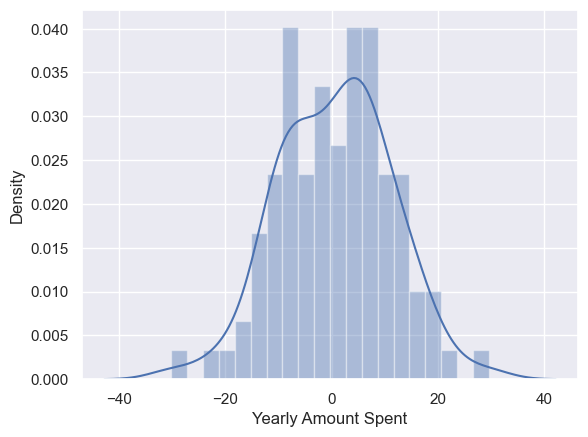

In [30]:
sns.distplot(y_pred-y_test, bins=20)

Comparamos el y_test con el y_pred (recordemos que debería ser similar a una recta $y=x$):

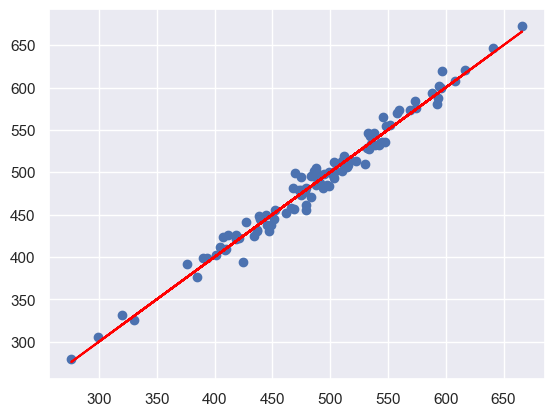

In [31]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color='red')